# K-Nearest Neighbour (KNN)

**Name - Mitul Srivastava**

**ID - C00313606**

## **LOG** : Introduction to dataset and importing the data.
### **Dataset** :  Drug Classification dataset
### **Link** : https://www.kaggle.com/datasets/prathamtripathi/drug-classification
### **Details** : The datset contains total 6 columns with 5 features to predict the type of drug.
### **AIM** : To use and fine tune KNN algorithm to classify drug type.

In [3]:
import pandas as pd
data = pd.read_csv("C:/Users/Mitul/Desktop/Study/Algorithms/KNN/drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### **LOG** : Encoding the categorical using labelEncoder from sklearn.preprocessing.
### *LabelEncoder is a preprocessing tool in scikit-learn that converts categorical labels into numerical values. It assigns a unique integer (0, 1, 2, etc.) to each category, making it suitable for encoding target variables in classification problems*

In [6]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Sex']=label.fit_transform(data["Sex"])
data['BP']=label.fit_transform(data["BP"])
data['Cholesterol']=label.fit_transform(data["Cholesterol"])

### **LOG** : Splitting data into X (Independent Features) and y (Target variable)

In [7]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

### **LOG** : Splitting the data in training and test using train_test_split from sklearn.model_selection
### **Explaination** : In train_test_split we are taking the test_size as 0.2 that means 20% of data will be used for testing and keeping random_state = 42 for code reproducibility.

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### **LOG** : Using the KNeighborsClassifier to train the model for K values 1 to 10 to find the most suitable value from k using fbeta_score. From the below graph we see k = 3 has the highest fbeta_score which means it has highest recall and precision for this value of k.
### *KNeighborsClassifier is a machine learning algorithm from scikit-learn that implements the k-Nearest Neighbors (k-NN) classification. It classifies a data point based on the majority class of its nearest k neighbors, with options to weigh neighbors differently (e.g., by distance).*
### *fbeta_score is a performance metric that balances precision and recall, giving more weight to recall when β > 1 and precision when β < 1.*

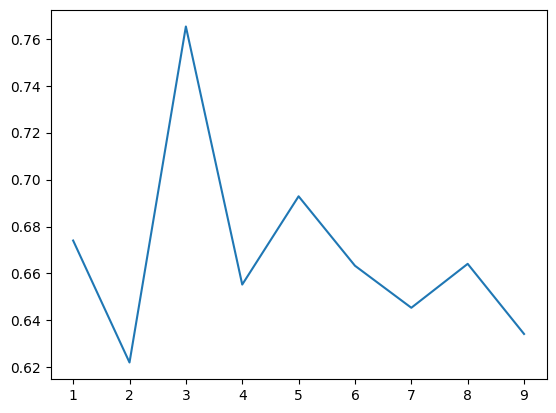

In [13]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score
k_range = list(range(1, 10))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    scores.append(fbeta_score(y_test, y_pred_k,beta=2,average='weighted'))
plt.plot(k_range, scores)
plt.show()

### **LOG** : Training the KNN model for k =3.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=knn.predict(X_test)

### **LOG** : Evaluation report analysis
### Precision - How many predicted values matched the actual value.
### Recall - How many in total were coreectly identified.
### F1 score - Harmonic mean of Precision and Recall.

### **Results :**
### 1. The model has an accuracy of 78 percent.
### 2. All the 15 instances for Drug Y were correctly identified and it has a F1 score of 1.
### 3. Drug A and X predictions were moderately correct and they have 0.67 and 0.73 as F1 scores.
### 4. The model performed poorly having F1 score of less than 0.60 for Drug B and C.

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediction
y_pred = model.predict(X_test)

# E valuation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       0.56      0.83      0.67         6
       drugB       0.50      0.67      0.57         3
       drugC       1.00      0.20      0.33         5
       drugX       0.73      0.73      0.73        11

    accuracy                           0.78        40
   macro avg       0.76      0.69      0.66        40
weighted avg       0.82      0.78      0.76        40

[[15  0  0  0  0]
 [ 0  5  0  0  1]
 [ 0  0  2  0  1]
 [ 0  3  0  1  1]
 [ 0  1  2  0  8]]


### **LOG** : Tweaking hyperparameter to increase accuracy of the model.
### Changing the weights parameter to distance which is by default uniform which means model will give preference to points which are closer.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=3,weights="distance")
model2.fit(X_train,y_train)
y_pred2=knn.predict(X_test)

### **LOG** : Updated results
### **RESULTS**:
### 1. The accuracy of the model increased by 2 percent from 78 to 80.
### 2. Using the updated the models prediction became better for Drug A and C which resulted in the increase in accuracy.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediction
y_pred2 = model2.predict(X_test)

# E valuation metrics
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       0.71      0.83      0.77         6
       drugB       0.50      0.67      0.57         3
       drugC       0.67      0.40      0.50         5
       drugX       0.73      0.73      0.73        11

    accuracy                           0.80        40
   macro avg       0.72      0.73      0.71        40
weighted avg       0.80      0.80      0.80        40

[[15  0  0  0  0]
 [ 0  5  0  0  1]
 [ 0  0  2  0  1]
 [ 0  2  0  2  1]
 [ 0  0  2  1  8]]


### **LOG** : Fine tuning using GridSearchCV
### The parameters selected by GridSearchCV are metric as manhattan, neighbours as 5 and weights as distance.

### *GridSearchCV is a technique used for hyperparameter tuning in machine learning models. It systematically searches for the best combination of hyperparameters from a predefined set by training and evaluating the model using cross-validation.*

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


### **LOG** : GridSearchCV Results
### **RESULTS**:
### Using the GridSearchCV the model gives an 78 percent accuracy which is similar to model 1 but less than model 2.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediction
y_pred3=grid_search.predict(X_test)

# E valuation metrics
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       0.83      0.83      0.83         6
       drugB       0.50      0.67      0.57         3
       drugC       0.50      0.20      0.29         5
       drugX       0.62      0.73      0.67        11

    accuracy                           0.78        40
   macro avg       0.69      0.69      0.67        40
weighted avg       0.77      0.78      0.76        40

[[15  0  0  0  0]
 [ 0  5  0  0  1]
 [ 0  0  2  0  1]
 [ 0  1  0  1  3]
 [ 0  0  2  1  8]]


### **REFERENCES** :
### https://chatgpt.com/
### https://www.kaggle.com/
### https://notebook.community/RagsX137/TF_Tutorial/My+own+KNN+Classifier

## **END**